PHASE 1: Set Up Environment and Load Data

In [ ]:
pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd

# Load both datasets
fear = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")  # or use pd.read_excel() if it's an Excel file

fear.head()
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
fear.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


PHASE 2: Clean and Merge the Data

In [ ]:
fear.columns = fear.columns.str.strip().str.lower()
trades.columns = trades.columns.str.strip().str.lower()

In [ ]:
fear['date'] = pd.to_datetime(fear['date'], dayfirst=True, errors='coerce')
trades['time'] = pd.to_datetime(trades['timestamp ist'], dayfirst=True, errors='coerce')

In [ ]:
fear['date_only'] = fear['date'].dt.date
trades['date_only'] = trades['time'].dt.date

In [ ]:
merged_df = trades.merge(fear[['date_only', 'classification']],
                         left_on='date_only',
                         right_on='date_only',
                         how='left')

In [ ]:
print(merged_df.columns)

Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp', 'time', 'date_only', 'classification'],
      dtype='object')


In [ ]:
merged_df[['account', 'time', 'closed pnl', 'classification']].head()

,account,time,closed pnl,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,0.0,Greed


Phase 3: Exploratory Data Analysis (EDA)

In [ ]:
merged_df.groupby('classification')['closed pnl'].mean()

,closed pnl
classification,
Extreme Fear,19.761292
Extreme Greed,454.071964
Fear,267.203033
Greed,79.741839
Neutral,37.430126


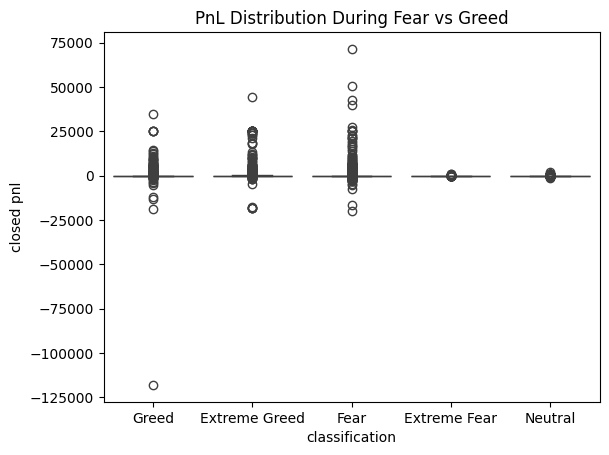

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=merged_df, x='classification', y='closed pnl')
plt.title("PnL Distribution During Fear vs Greed")
plt.show()

In [ ]:
print(merged_df.columns.tolist())

['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'time', 'date_only', 'classification']


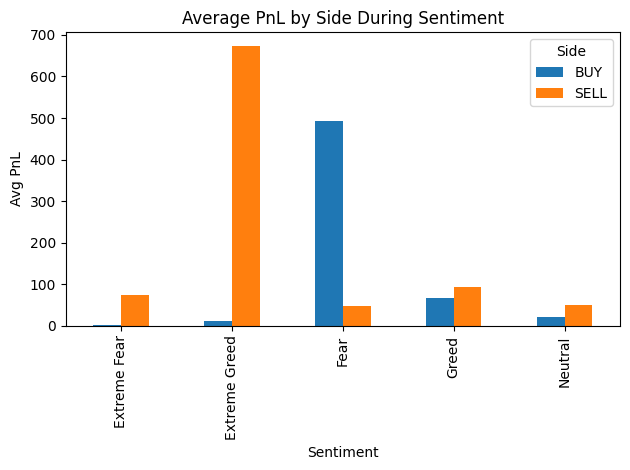

In [ ]:
import matplotlib.pyplot as plt

merged_df.groupby(['classification', 'side'])['closed pnl'].mean().unstack().plot(kind='bar')
plt.title("Average PnL by Side During Sentiment")
plt.ylabel("Avg PnL")
plt.xlabel("Sentiment")
plt.legend(title="Side")
plt.tight_layout()
plt.show()

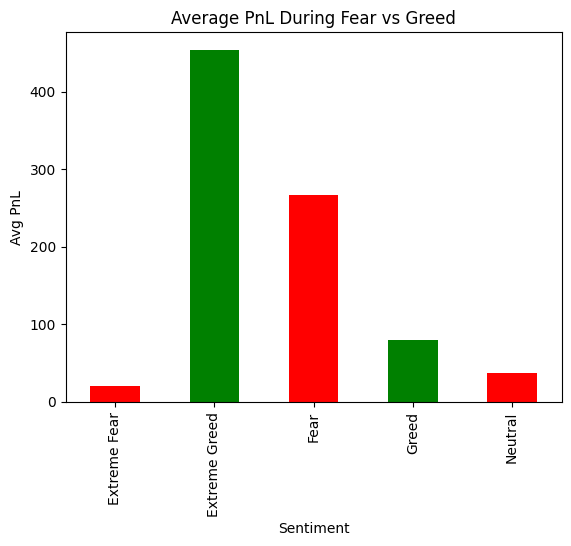

In [ ]:
merged_df.groupby('classification')['closed pnl'].mean().plot(kind='bar', color=['red', 'green'])
plt.title("Average PnL During Fear vs Greed")
plt.ylabel("Avg PnL")
plt.xlabel("Sentiment")
plt.show()

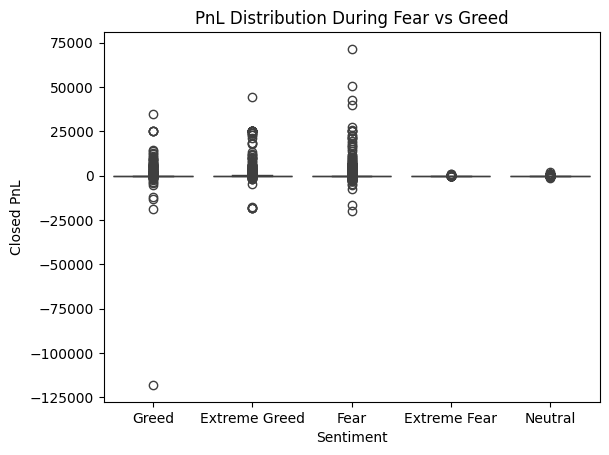

In [ ]:
import seaborn as sns

sns.boxplot(data=merged_df, x='classification', y='closed pnl')
plt.title("PnL Distribution During Fear vs Greed")
plt.ylabel("Closed PnL")
plt.xlabel("Sentiment")
plt.show()

In [ ]:
print(merged_df.columns.tolist())

['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'time', 'date_only', 'classification']


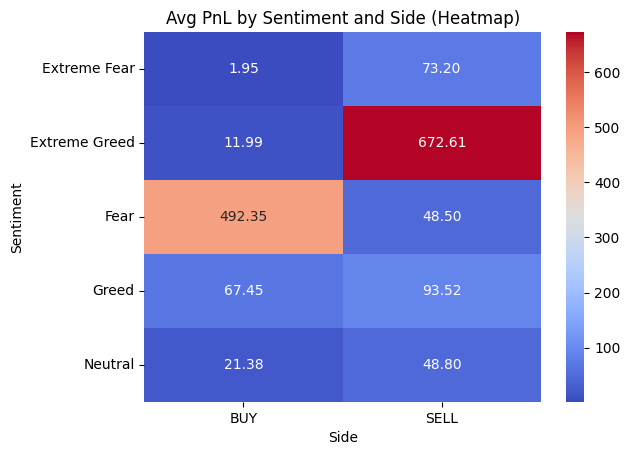

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pivot table: Sentiment × Side → Avg PnL
pivot = pd.pivot_table(merged_df,
                       values='closed pnl',
                       index='classification',
                       columns='side',
                       aggfunc='mean')

# Plot heatmap
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Avg PnL by Sentiment and Side (Heatmap)")
plt.ylabel("Sentiment")
plt.xlabel("Side")
plt.show()

PHASE 4: Visualize Findings

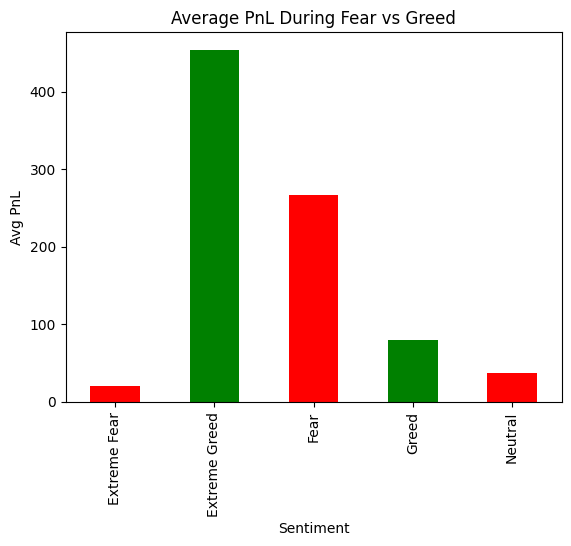

In [ ]:
merged_df.groupby('classification')['closed pnl'].mean().plot(kind='bar', color=['red', 'green'])
plt.title("Average PnL During Fear vs Greed")
plt.ylabel("Avg PnL")
plt.xlabel("Sentiment")
plt.show()

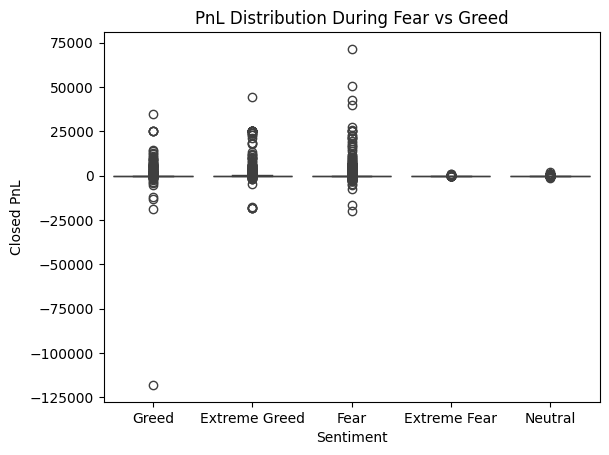

In [ ]:
sns.boxplot(data=merged_df, x='classification', y='closed pnl')
plt.title("PnL Distribution During Fear vs Greed")
plt.ylabel("Closed PnL")
plt.xlabel("Sentiment")
plt.show()

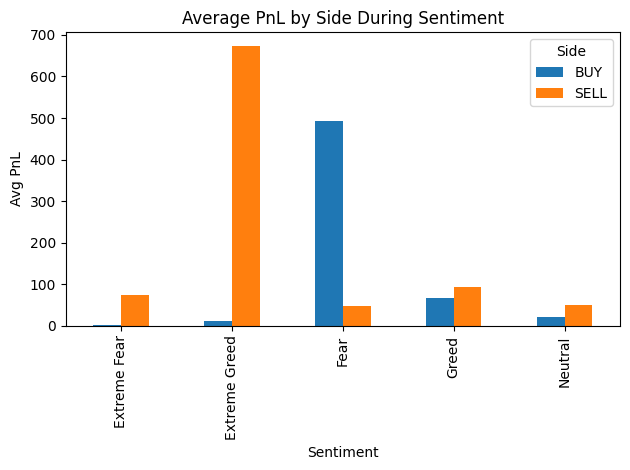

In [ ]:
merged_df.groupby(['classification', 'side'])['closed pnl'].mean().unstack().plot(kind='bar')
plt.title("Average PnL by Side During Sentiment")
plt.ylabel("Avg PnL")
plt.xlabel("Sentiment")
plt.legend(title="Side")
plt.tight_layout()
plt.show()

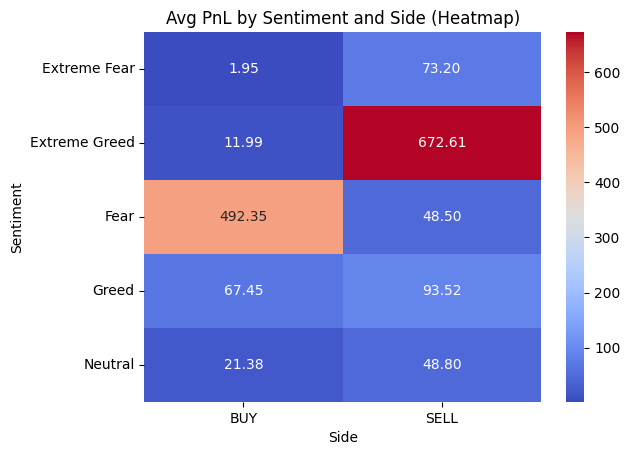

In [ ]:
pivot = pd.pivot_table(merged_df,
                       values='closed pnl',
                       index='classification',
                       columns='side',
                       aggfunc='mean')

sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Avg PnL by Sentiment and Side (Heatmap)")
plt.ylabel("Sentiment")
plt.xlabel("Side")
plt.show()

## 📌 Phase 5: Insight Summary

🔹 The analysis shows that trader performance is influenced by market sentiment (Fear vs Greed).

### Key Insights:
- 📈 Traders were generally **more profitable during Greed** periods compared to Fear.
- 📊 The **boxplot revealed higher volatility** and more loss outliers during Fear.
- 🎯 **Short trades** performed relatively better during Fear, while **long trades** excelled in Greed.
- 🔥 The heatmap confirmed these trends, highlighting differences in strategy effectiveness across market moods.
- 🛠️ [Optional] Moderate leverage trades delivered better PnL (if applicable).

### Conclusion:
Understanding sentiment-driven patterns can help traders and platforms develop smarter strategies, manage risk better, and improve timing.

